In [1]:
import pandas as pd
df = pd.read_csv("advertising[1].csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


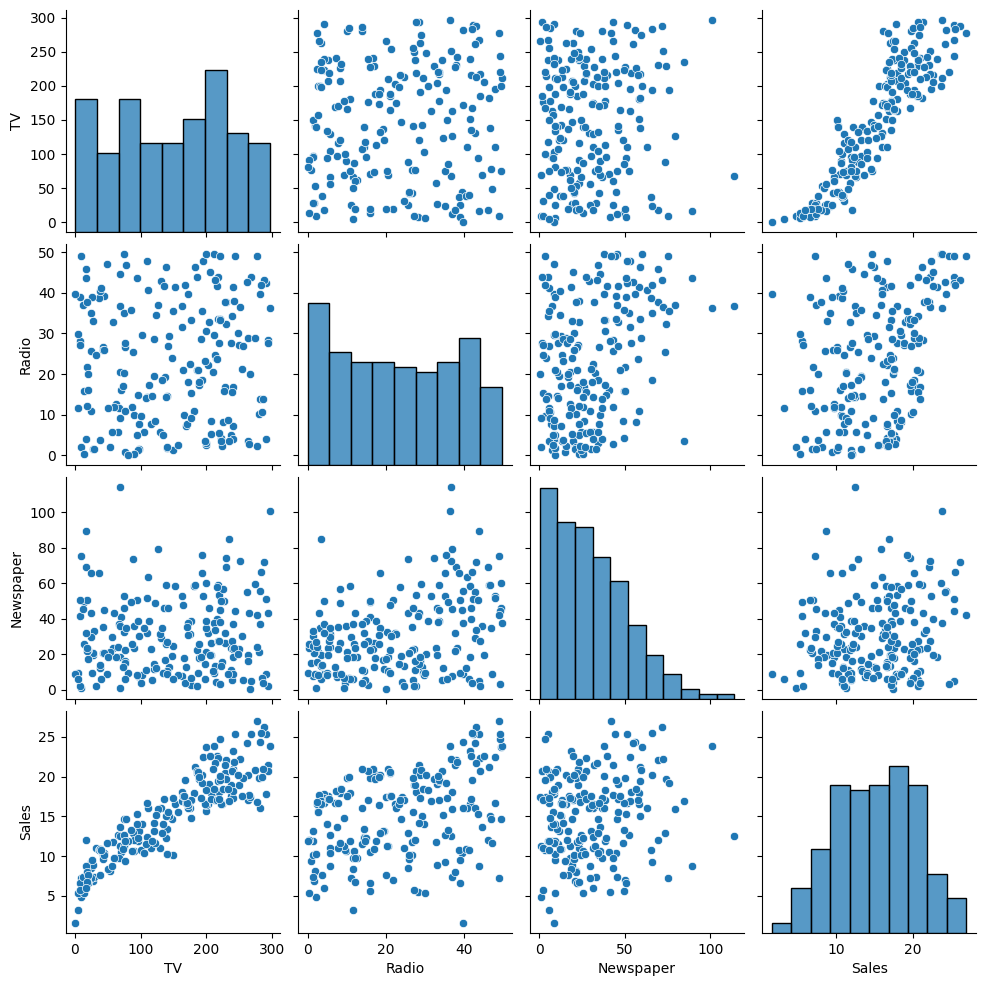

In [2]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [6]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
svr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

Linear Regression:
MAE: 1.275, MSE: 2.908, RMSE: 1.705

Polynomial Regression:
MAE: 0.903, MSE: 1.443, RMSE: 1.201

SVR:
MAE: 1.555, MSE: 4.421, RMSE: 2.103



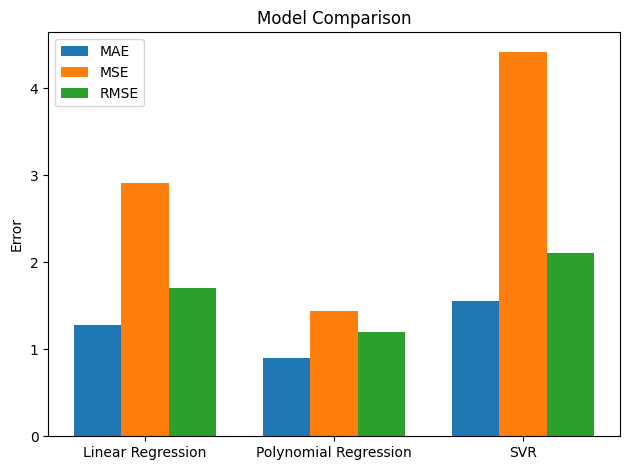

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
def evaluate(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse
metrics = {
    'Linear Regression': evaluate(y_test, y_pred_lr),
    'Polynomial Regression': evaluate(y_test, y_pred_poly),
    'SVR': evaluate(y_test, y_pred_svr)
}
for model, values in metrics.items():
    print(f"{model}:\nMAE: {values[0]:.3f}, MSE: {values[1]:.3f}, RMSE: {values[2]:.3f}\n")
mae_vals = [v[0] for v in metrics.values()]
mse_vals = [v[1] for v in metrics.values()]
rmse_vals = [v[2] for v in metrics.values()]
models = list(metrics.keys())
x = np.arange(len(models))
width = 0.25
plt.bar(x - width, mae_vals, width=0.25, label='MAE')
plt.bar(x, mse_vals, width=0.25, label='MSE')
plt.bar(x + width, rmse_vals, width=0.25, label='RMSE')
plt.xticks(x, models)
plt.ylabel("Error")
plt.title("Model Comparison")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

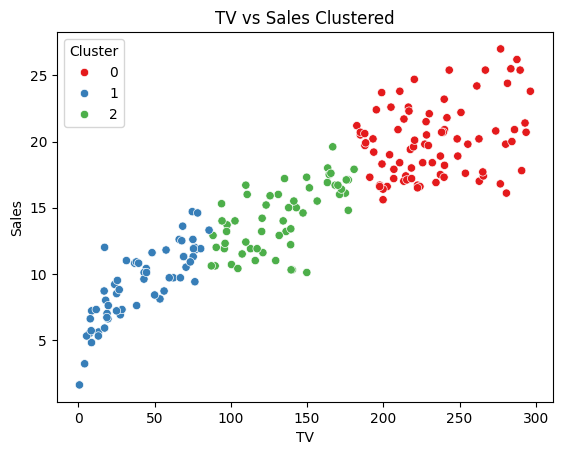

In [9]:
sns.scatterplot(data=df, x='TV', y='Sales', hue='Cluster', palette='Set1')
plt.title("TV vs Sales Clustered")
plt.show()